### 1. Import Data and required packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

#### Checking for Missing Values

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset

### Check Duplicates

In [7]:
df.duplicated().sum() #df.drop_duplicates(inplace=True)

0

### Check Data Types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Checking the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Check Statistics of Data set

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insight

##### 1.All means are close to each other - between 66 and 68.05 
##### 2.All standard deviations are also close-between 14.6 and 15.19
##### 3.While there is a minimum score 0 for math ,for writing minimum is much higher = 10 and for reading myet higher = 17


#### Exploring Data

In [11]:
print("\nCategories in 'gender' variable:                              ",end=" " )
print(df['gender'].unique())

print("\nCategories in 'race_ethnicity' variable:                      ",end=" ")
print(df['race_ethnicity'].unique())

print("\nCategories in'parental level of education' variable:          ",end=" " )
print(df['parental_level_of_education'].unique())

print("\nCategories in 'lunch' variable:                               ",end=" " )
print(df['lunch'].unique())

print("\nCategories in 'test preparation course' variable:             ",end=" " )
print(df['test_preparation_course'].unique())


Categories in 'gender' variable:                               ['female' 'male']

Categories in 'race_ethnicity' variable:                       ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in'parental level of education' variable:           ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in 'lunch' variable:                                ['standard' 'free/reduced']

Categories in 'test preparation course' variable:              ['none' 'completed']


In [12]:
numeric_features     =    [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features =    [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### Adding New columns Total Score and Average Score

In [14]:
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average']     = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

print('{} Students have got full marks in reading'.format(reading_full))
print('{} Students have got full marks in writing'.format(writing_full))
print('{} Students have got full marks in math'.format(math_full))

17 Students have got full marks in reading
14 Students have got full marks in writing
7 Students have got full marks in math


In [16]:
reading_less = df[df['reading_score']<=20]['average'].count()
writing_less = df[df['writing_score']<=20]['average'].count()
math_less = df[df['math_score']<=20]['average'].count()

print('{} Students have got less than 20 marks in reading'.format(reading_less))
print('{} Students have got less than 20 marks in writing'.format(writing_less))
print('{} Students have got less than 20 marks in math'.format(math_less))

1 Students have got less than 20 marks in reading
3 Students have got less than 20 marks in writing
4 Students have got less than 20 marks in math


Insights

1. From above values we can observe that students have performed well in reading
2. Worst performance was in math 

#### Visualization

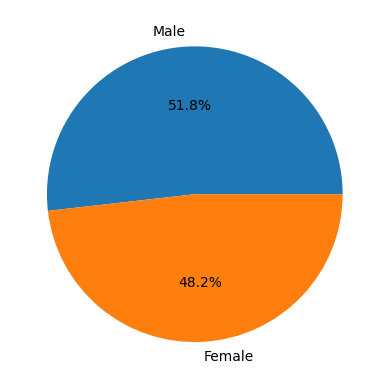

In [55]:
labels=['Male','Female']
fig,ax=plt.subplots()
ax.pie(df['gender'].value_counts(),labels=labels,autopct='%1.1f%%')
plt.show()

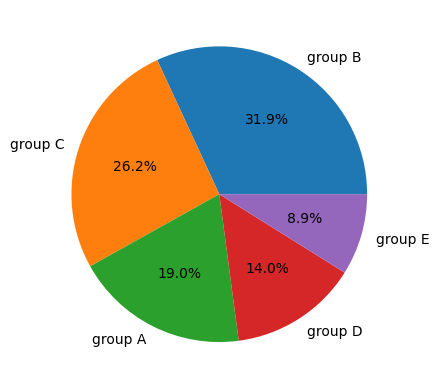

In [56]:
labels=df['race_ethnicity'].unique()
fig,ax=plt.subplots()
ax.pie(df['race_ethnicity'].value_counts(),labels=labels,autopct='%1.1f%%')
plt.show()

In [58]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


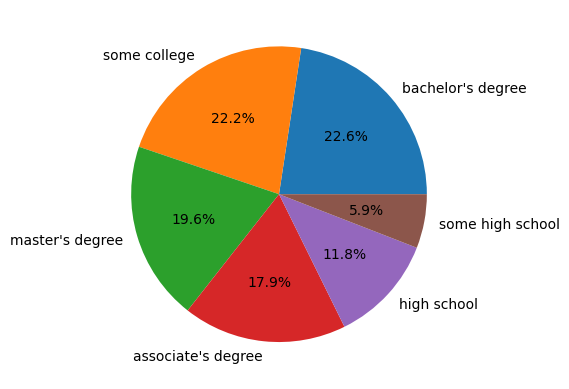

In [59]:
labels=df['parental_level_of_education'].unique()
fig,ax=plt.subplots()
ax.pie(df['parental_level_of_education'].value_counts(),labels=labels,autopct='%1.1f%%')
plt.show()

In [68]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


#### Visualize average score distribution to make some conclusion
1. Histogram
2. Kernel Distribution Function (KDE)

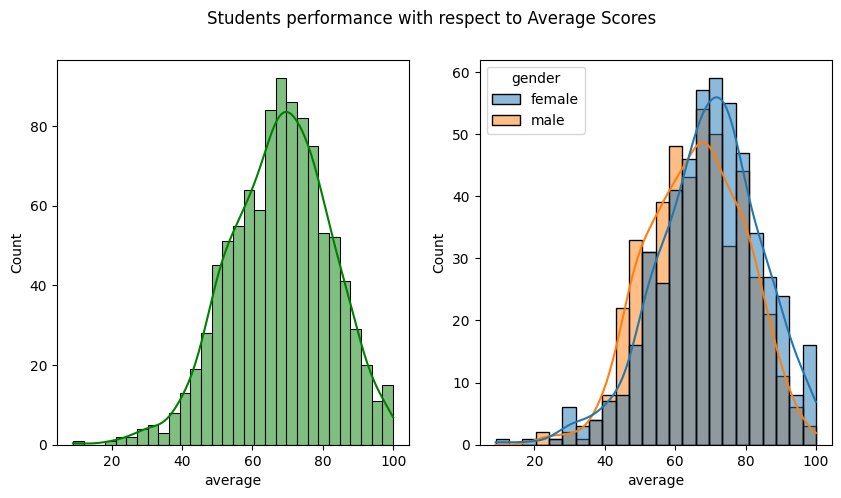

In [65]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Students performance with respect to Average Scores')
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

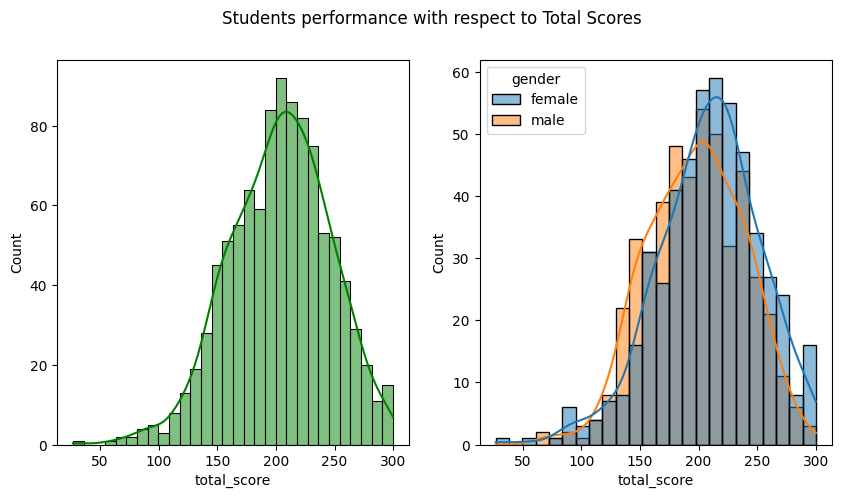

In [64]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
fig.suptitle('Students performance with respect to Total Scores')
plt.show()

Insight 
1. Female Students perform better than male students

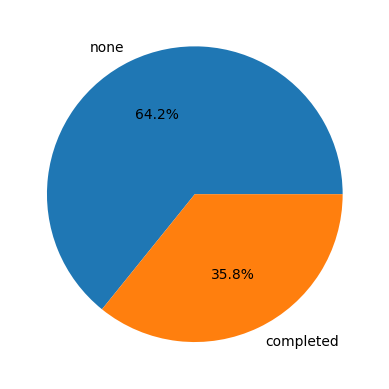

In [70]:
labels=df['test_preparation_course'].unique()
fig,ax=plt.subplots()
ax.pie(df['test_preparation_course'].value_counts(),labels=labels,autopct='%1.1f%%')
plt.show()